# CS 171 PS 1
# Due: Friday, January 26, 2024 @ 11:59pm

## Read *all* cells carefully and answer all parts (both text and missing code)

### Enter your information below:

<div style="color: #000000;background-color: #EEEEFF">
    Your Name (submitter):  Ivan Ao<br>
    Your student ID (submitter): 862330140
    
<b>By submitting this notebook, I assert that the work below is my own work, completed for this course.  Except where explicitly cited, none of the portions of this notebook are duplicated from anyone else's work or my own previous work.</b>
</div>


<div class="alert alert-success">
    <font size=+2>Total Problem Set Grading</font> (to be completed by grader)<br>
    Total Points: /20<br>
    Late Days Used on this Assignment: <br>
    Total Late Days Used: <br>
</div>

## Overview

This problem set deals with IMDB review data (from [here](https://ai.stanford.edu/~amaas/data/sentiment/)).  This dataset consists of reviews with either bad (<=4) or good (>=7) ratings.  The cells below load in training and testing data.  For each point, there are 1000 features, corresponding to the 1000 most common words in the reviews.  Each feature's value is either "none," "once," "couple," "few," "many," or "lots" indicating qualitatively how often the word appears in the review.  These values are encoded as integers from 0 to 5, with 0 indicating "none" and 5 indicating "lots."  These are categorical features.  The corresponding y values are 0 for a "bad" rating and 1 for a "good" rating.

In [1]:
## THESE ARE THE ONLY LIBRARIES YOU MAY IMPORT!!
import numpy as np
import matplotlib.pyplot as plt

# below line just to make figures larger
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
def loaddata(fname):
    # ignore how this works! (I'm manipulating a dataset to match the needs for this problem set)
    M = np.loadtxt(fname,dtype=float)
    rs = np.random.RandomState(seed=8675309)
    np.random.shuffle(M)
    bi = np.where(M[:,0]==-1)[0]
    gi = np.where(M[:,0]==1)[0]
    M = M[np.hstack((gi,bi[:-4166])),:]
    np.random.shuffle(M)
    X = M[:,1:]
    threshs = [0,1,2,5,10,20,1024]
    for (i,(t1,t2)) in enumerate(zip(threshs[:-1],threshs[1:])):
        X[(X>t1) & (X<=t2)] = i
    Y = M[:,0]
    Y[Y<=0] = 0 # data is originally +1, -1
    return (X,Y)

In [3]:
(trainX,trainY) = loaddata('/usr/local/cs171/imdbtrain.txt')
(testX,testY) = loaddata('/usr/local/cs171/imdbtest.txt')

<div style="color: #000000;background-color: #FFFFEE"><font size=+2>Question 1:</font> <font size=+1>(4 points)</font></div>
<div class="alert alert-success">
    <font size=+1>Grading</font> (to be completed by grader)<br>
    Score: /4<br>
</div>

<div style="color: #000000;background-color: #FFFFEE">
In the cell below, plot a grid of histograms (5 columns, 5 rows)
Each histogram should be the distribution of a different feature (so you will be plotting just the first 25 features).  The histograms should have two sets of bars (each in their own color): ones for examples from class 0 and one for examples from class 1.  You want side-by-side histograms, each with 6 bars (for 12 bars in two colors). Be sure to give a title to each plot with the feature number.  Use only the training data for these histograms.
    
Hint: look up pyplot's [subplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplot.html) and [hist](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html) functions
    
As an example, the histogram in the upper left, corresponding to feature 0, should look like
    
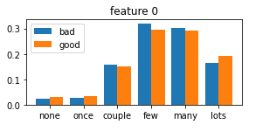
</div>

In [4]:
trainX

array([[3., 1., 1., ..., 0., 0., 0.],
       [5., 4., 3., ..., 0., 0., 0.],
       [2., 1., 2., ..., 0., 0., 0.],
       ...,
       [3., 2., 2., ..., 0., 0., 0.],
       [3., 1., 0., ..., 0., 0., 0.],
       [3., 2., 2., ..., 0., 0., 0.]])

In [5]:
trainX.shape

(20834, 1000)

In [6]:
trainY.shape

(20834,)

In [7]:
X = trainX[:, :25]

In [8]:
X_good = X[trainY == 1].T
X_bad = X[trainY == 0].T

In [9]:
X_good

array([[5., 2., 4., ..., 5., 3., 3.],
       [4., 1., 2., ..., 4., 2., 2.],
       [3., 2., 2., ..., 4., 2., 2.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 2.],
       [2., 0., 0., ..., 0., 1., 0.]])

In [10]:
X_good.shape

(25, 12500)

In [11]:
X_bad.shape

(25, 8334)

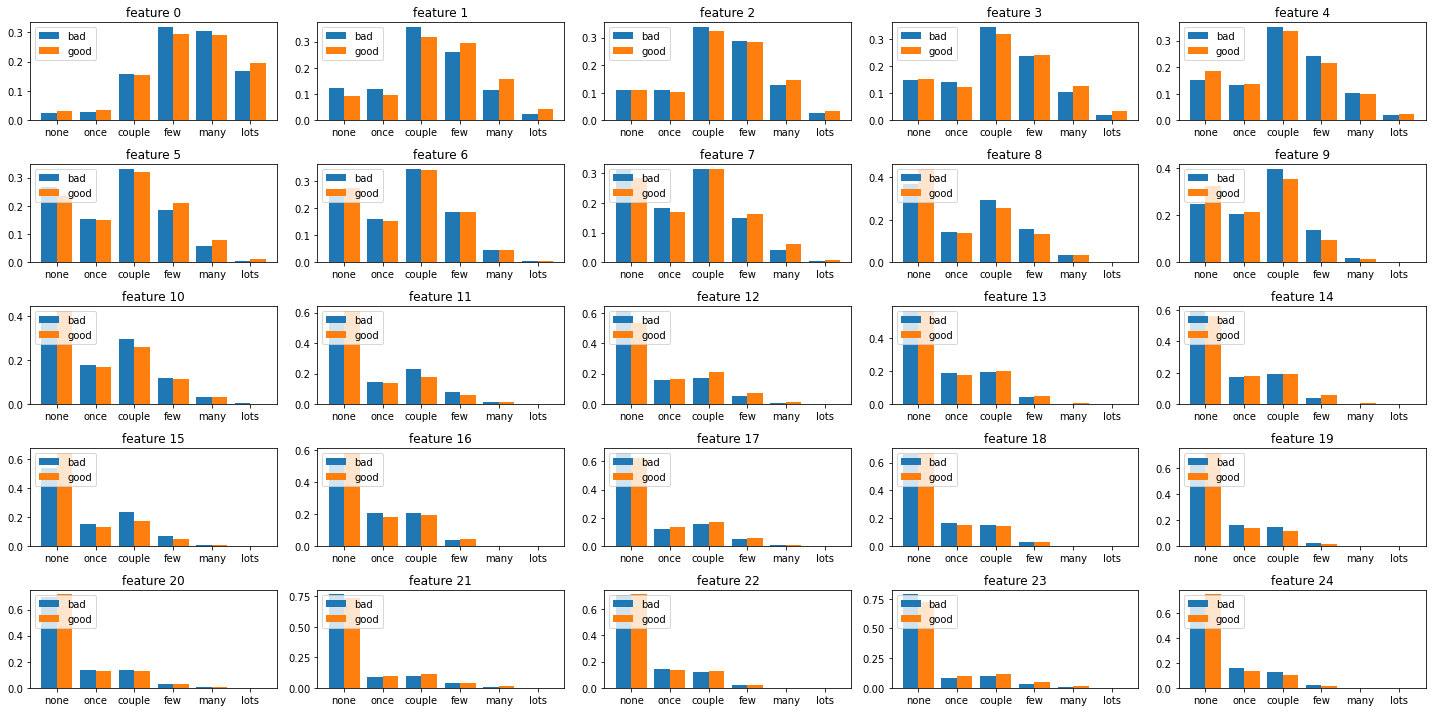

In [12]:
xlab = ("none", "once","couple","few","many","lots")
x = np.arange(len(xlab))
bins = np.arange(len(xlab) + 1) - 0.5
fig, axes = plt.subplots(nrows = 5, ncols = 5, figsize = (20,10))

for i, ax in enumerate(axes.flat, start = 0):
    ax.set_title('feature {}'.format(i))
    ax.hist([X_bad[i], X_good[i]], density = True, bins = bins, label = ["bad", "good"])
    ax.legend(loc='upper left')
    ax.set_xticks(x)
    ax.set_xticklabels(xlab)

plt.tight_layout()
plt.show()

<div style="color: #000000;background-color: #FFFFEE">
    <font size=+2>Question 2:</font> <font size=+1>(4 points)</font>
   </div>
   <div class="alert alert-success">
    <font size=+1>Grading</font> (to be completed by grader)<br>
    Score: /4<br>
</div>

<div style="color: #000000;background-color: #FFFFEE">
    
For the 25 features above, based on the histograms you plotted, which would the most helpful three features for classifying this dataset using naive Bayes?  Which would be the least helpful feature?  <b>WHY?</b>
</div>
    

### Your Answer Here
I think feature 0, 1 and 4  are the most helpful three features for classifying this dataset using naive Bayes, because each feature between good and bad are higher than others, it's easier for us to find the different.

The least helpful will be feature 18, 20, 22. because the difference between good and bad are little.


<div style="color: #000000;background-color: #FFFFEE">
    <font size=+2>Question 3:</font> <font size=+1>(10 points)</font>
   </div>
   <div class="alert alert-success">
    <font size=+1>Grading</font> (to be completed by grader)<br>
    Score: /10<br>
</div>

<div style="color: #000000;background-color: #FFFFEE">
        
Complete the two functions in the two cells below.

The first trains/learns a naive Bayes classifier.  The second predicts the classes for a set of examples based on the model learned.
    
Hint:  Test your code on the example from the slides in class.  You'll need to generate the data matrix yourself and your own testing examples.
    
Hint 2: You will have to deal with counts that are 0.  Leaving them as zero will result in 0 probabilities that will cause problems.  A standard way to handle this is to add 1 to all counts (this is often called LaPlace smoothing).  For frequent feature values, it does not change things much.  For infrequent values, it keeps them away from 0 and admits that they might happen more often than was seen in the data.  This is like pretending there are extra examples that cause the raw counts to increase by 1.  
</div>

In [13]:
def learnnb(X,Y):
    # X is shape (m,n) (m data points, each with n features).  It has integer values from 0 to maxfeatval (inclusive)
    # Y is shape (m,) (m data points).  It has values of either 0 or 1 (class "0" or class "1")
    maxfeatval = X.max().max()

    
    # this function is to return a pair (priorp,condp)
    # where priorp is of shape (2,) and has the prior probability of each of the two classes
    #  and  condp is of shape (n,maxfeatval+1,2) and has the conditional probabilities for the naive Bayes classifier
    ## YOUR CODE HERE
    maxfeatval = np.intc(maxfeatval)
    m, n = X.shape

    priorp = [np.sum(Y ==0) / m, np.sum(Y == 1) / m]

    condp = np.ones((n ,maxfeatval + 1, 2))

    # type is the review type, 1 for good, 0 for bad
    for type in range(2):
        X_review = X[Y == type]
        for feature in range(n):
            for value in range(maxfeatval):
                # count 
                condp[feature,value,type] += np.sum(X_review[:,feature] == value)
            # divide by total of that type
            condp[feature, :, type] /= (np.sum(Y == type) + maxfeatval + 1)

    return priorp, condp
    # return (priorp,condp)  ## or whatever they are named in your code

In [14]:
def prednb(X,model):
    # X is of shape (m,n) (m data points, each with n features).
    # model is the pair (priorp,condp), as returned from learnnb
    # should return something of shape (m,) which is an array of 0s and 1s, indicating
    # the predicted (most probable under NB) class for each of the examples in X
    (priorp,condp) = model

    ## YOUR CODE HERE

    m, n = X.shape
    
    maxfeatval = condp.shape[1] - 1
    # create a list with all 0s
    predictions = np.zeros(m)

    for i in range(m):
        # set for the prob.
        # i can also change it to log prob to reduce the calculation. log(ab) = log a + log b. 
        # Make the calculation easier using addition instead of multiplication.
        prob_0 = priorp[0]
        prob_1 = priorp[1]
        
        for feature in range(n):
            value = np.intc(X[i,feature])
            prob_0 *= condp[feature, value, 0]
            prob_1 *= condp[feature, value, 1]
            
        if(prob_0 > prob_1):
            predictions[i] = 0
        else:
            predictions[i] = 1

    return predictions
    

<div style="color: #000000;background-color: #FFFFEE">
The code below trains a naive Bayes classifier and then tests it on the testing examples and reports the error rate.
    
Run the code.  [note, just because your code runs on this example, does not mean it is correct.]
    
Then answer the question, "<b>Is this error rate good?  How do you know?</b>"
</div>


In [18]:
# first value is yes 1 no 0  , second value 0 sunny, 1 cloudy, 2 raining, third value  yes 1, no 0.

setX = [[0,0,0],
       [0,0,1],
       [0,1,1],
       [1,0,0],
       [0,2,0],
       [0,2,1],
       [1,1,1],
       [0,0,0],
       [1,0,0],
       [0,1,0]]
setX = np.array(setX)
# 1 for 113, 0 for 75
setY = [1,1,0,1,1,0,0,1,0,1]
setY = np.array(setY)

xtrain = setX[0:7]
ytrain = setY[0:7]
xtest = setX[7:]
ytest = setY[7:]


model = learnnb(xtrain,ytrain)
ypred = prednb(xtest,model)
print(errorrate(ypred,ytest))



0.3333333333333333


In [17]:
def errorrate(predY,trueY):
    if len(predY.shape)>1:
        predY = predY[:,0]
    if len(trueY.shape)>1:
        trueY = trueY[:,0]
    return (predY!=trueY).mean()

model = learnnb(trainX,trainY)
predY = prednb(testX,model)
print(errorrate(predY,testY))

0.26643947393683404


### YOUR ANSWER HERE

This error rate is not good because 1/4 answer is wrong and it is unacceptable consider how many review will be label wrong if we have lots of review. for the class example, the error rate is 0.3 and it's also really high.
